#### Description of the IMERG files

The IMERG daily files (https://drive.google.com/drive/folders/1b0WH-lY5bnHZ-jQo-i1XqX1M0OgKHXW5?usp=sharing) were created by summation of the original half-hourly files.  Therefore the 'precip' fields in the files need to be divided by 48 to get precipitation expressed in mm/hour.  Also, the initial IMERG fields are at 0.1 degree resolution.  I aggregated them to 0.5 resolution for easier manipulation and reduction of data size.

The are 184 days in a yearly file.  The first day is the 59th day of the year.  The reason for this was to reduce the data size (at least in the begining).  The 184 days in the files are (according to some climatologies) more rainy than those not included.  We can refinethe analysis and add the excluded days, once all elements are in place.

The IMERG files are global.  To select the region of interest, variables nx1, nx2, ny1 and ny2 need to be specifed.  A larger or smaller regional window can be selected by changing nx1, nx2, ny1 and ny2 below. A too large region would lead to classes that are dominated by larger (more global) meteorological scales, while a too small would miss the larger context. Some analysis of how the window size impacts the resulting classes needs to be done, but, for now, nx1,nx2,ny1 and ny2 below are probably appropriate.


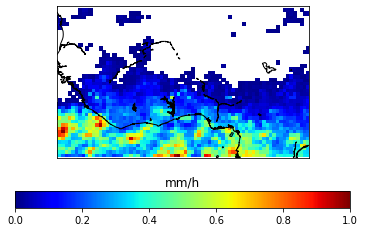

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from netCDF4 import Dataset


m = Basemap(projection='mill',llcrnrlat=0.0,urcrnrlat=22,\
            llcrnrlon=-17,urcrnrlon=20,resolution='i')
m.drawcoastlines()

import numpy as np
import datetime
import glob

fs=glob.glob("prec*.nc")  
fs=sorted(fs)  #fs contains the list of IMERG files
nx1=325 # west-most index of the latitude coordinate
nx2=400 # east-most index of the latitude coordinate
ny1=180 # south-most index of the latitude coordinate
ny2=225 # north-most index of the latitude coordinate

for f1 in (fs[:1]): #here only the first file will be read
    fh=Dataset(f1,'r')
    precip=fh['precip'][:,nx1:nx2,ny1:ny2]/48.0
    # the precip data in the file is the
    # sum of the half hourly estimates
    lon=fh['lon'][nx1:nx2+1]
    lat=fh['lat'][ny1:ny2+1]
    lon2d,lat2d=np.meshgrid(lon,lat)
    xx,yy=m(lon2d,lat2d)
    precipm=np.ma.array(precip,mask=precip<0.01)
    m.pcolormesh(xx,yy,precipm[:31,:,:].mean(axis=0).T,vmin=0,vmax=1,\
                 cmap='jet')
    cbar=plt.colorbar(orientation='horizontal')
    cbar.ax.set_title("mm/h")
